# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Austria\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
!pip install newsapi-python

In [3]:
import requests
url = ('http://newsapi.org/v2/top-headlines?'
       'country=ca&'
       'apiKey=API_KEY')
response = requests.get(url)

In [4]:
# Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key='1b0b993143f444fd9a97584d9722f5bf')

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(q="bitcoin AND Bitcoin",language="en",page_size=100,sort_by="relevancy")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")
# Show sample article
bitcoin_news_en["articles"][0]

Total articles about Bitcoin: 4728


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [7]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(q="ethereum AND Ethereum",language="en",page_size=100,sort_by="relevancy")
# Print total articles
print(f"Total articles about Etherum: {ethereum_news_en['totalResults']}")
# Show sample article
ethereum_news_en["articles"][0]

Total articles about Etherum: 1308


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Bitcoin": title,
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Text","Compound","Positive","Negative","Neutral"]
bitcoin_df = bitcoin_df[cols]
#bitcoin_df.sort_values(by='Text',ascending=False,inplace=True)

bitcoin_df.head()

,Text,Compound,Positive,Negative,Neutral
0,a former microsoft software engineer from ukra...,-0.6705,0.064,0.199,0.737
1,visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,paypal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,"in november 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,"unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "Title Ehterum": title,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Title Ethereum": title,
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Text","Compound","Positive","Negative","Neutral"]
ethereum_df = ethereum_df[cols]
#bitcoin_df.sort_values(by='Positive',ascending=False,inplace=True)

ethereum_df.head()

,Text,Compound,Positive,Negative,Neutral
0,paypal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,file photo: representation of the ethereum vir...,0.0000,0.000,0.0,1.000
2,file photo: representation of the ethereum vir...,0.0000,0.000,0.0,1.000
3,london (reuters) - digital currencies ethereum...,0.4215,0.088,0.0,0.912
4,new york (reuters) - institutional investors p...,0.1779,0.052,0.0,0.948


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.149495,0.056714,0.020776,0.922520
std,0.336863,0.065687,0.053242,0.082909
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858500
50%,0.000000,0.050000,0.000000,0.948000
75%,0.399400,0.120000,0.000000,1.000000
max,0.877900,0.318000,0.363000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.240073,0.078608,0.019990,0.901412
std,0.359219,0.079333,0.043434,0.089321
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.850000
50%,0.226300,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.888500,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:Bitcoin with 0.922520

Q: Which coin had the highest compound score?

A: Bitcoin with 98.000000

Q. Which coin had the highest positive score?

A: Ethereum with 0.347000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Austria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Austria\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]
  

In [19]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,a former microsoft software engineer from ukra...,-0.6705,0.064,0.199,0.737,"[former, microsoft, software, engineer, ukrain..."
1,visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
2,paypal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[paypal, bringing, newlyannounced, support, cr..."
3,"in november 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
4,"unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[unlike, conventional, cryptocurrencies, centr..."


In [21]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.head()

,Text,Compound,Positive,Negative,Neutral,tokens
0,paypal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[paypal, bringing, newlyannounced, support, cr..."
1,file photo: representation of the ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,file photo: representation of the ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
3,london (reuters) - digital currencies ethereum...,0.4215,0.088,0.0,0.912,"[london, reuters, digital, currency, ethereum,..."
4,new york (reuters) - institutional investors p...,0.1779,0.052,0.0,0.948,"[new, york, reuters, institutional, investor, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [40]:
from collections import Counter
from nltk import ngrams

In [41]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens

bitcoin_tokens = get_tokens(bitcoin_df)
ethereum_tokens = get_tokens(ethereum_df)

In [42]:
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [43]:
# Generate the Bitcoin N-grams where N=2
#bitcoin_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
#bigram_counts = Counter(ngrams(bitcoin_df, n=2))
#print(dict(bigram_counts))
bigram_bitcoin = bigram_counter(bitcoin_tokens, 2)

In [45]:
# Generate the Ethereum N-grams where N=2
bigram_ethereum = bigram_counter(ethereum_tokens, 2)

In [47]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [48]:
# Get the top 10 words for Bitcoin
top_10_token_bitcoin = token_count(bitcoin_tokens)
top_10_token_bitcoin

[('char', 97),
 ('bitcoin', 82),
 ('reuters', 70),
 ('currency', 39),
 ('virtual', 33),
 ('photo', 31),
 ('taken', 31),
 ('illustration', 27),
 ('reutersdado', 27),
 ('representation', 26)]

In [49]:
# Get the top 10 words for Ethereum
top_10_token_ethereum = token_count(ethereum_tokens)
top_10_token_ethereum

[('char', 97),
 ('ethereum', 52),
 ('bitcoin', 40),
 ('reuters', 21),
 ('cryptocurrency', 18),
 ('blockchain', 18),
 ('currency', 13),
 ('asset', 13),
 ('price', 13),
 ('new', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [51]:
!pip install wordcloud

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

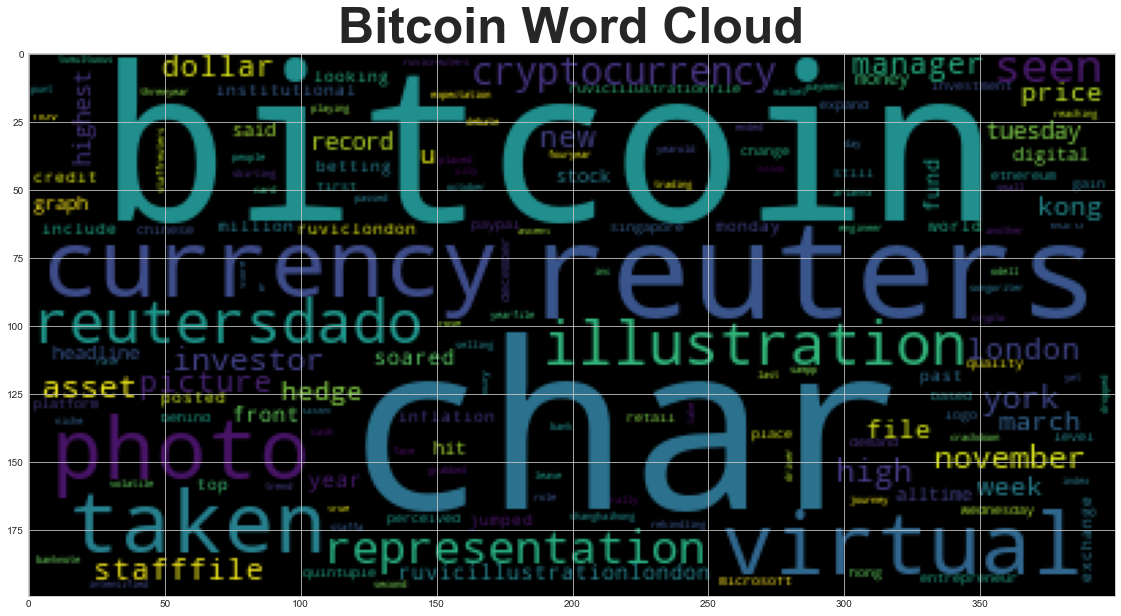

In [54]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(bitcoin_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

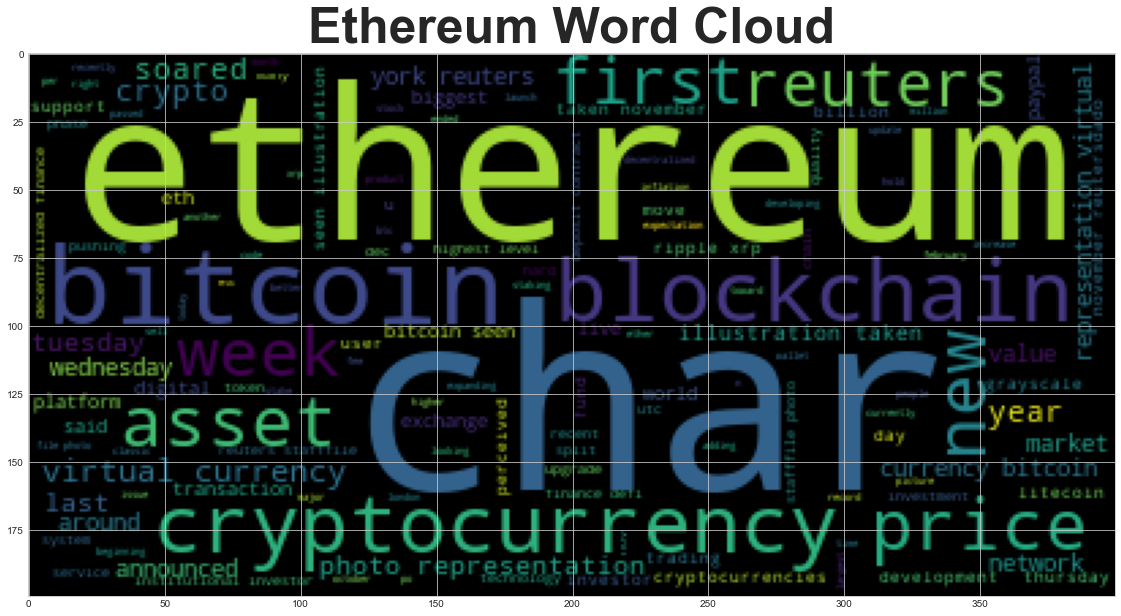

In [55]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ethereum_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [57]:
!pip install spaCy

In [82]:
import spacy
from spacy import displacy
import en_core_web_sm

In [83]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [94]:
# Load the spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

---
### Bitcoin NER

In [95]:
# Concatenate all of the Bitcoin text together
bitcoin_content = ' '.join(bitcoin_df['Text'])
print(bitcoin_content)

a former microsoft software engineer from ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from microsoft's online store. from 2016 to 2018, volod… [+3307 chars] visa has partnered with cryptocurrency startup blockfi to offer the first rewards credit card that pays out in bitcoin rather than cash, but is it worth applying for? unless youre extremely bullish o… [+2239 chars] paypal is bringing its newly-announced support for cryptocurrency to all us accounts. it first announced plans to open cryptocurrency trading to us-based users in october, but until now it was only a… [+589 chars] in november 2017, after an absolutely massive, two-month rally, bitcoin passed $10,000 for the first time. and then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the people’s bank of china. the move gives the c

In [96]:
# Run the NER processor on all of the text
doc= nlp(bitcoin_content)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [97]:
# Render the visualization
displacy.render(doc, style='ent')

In [98]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

microsoft ORG
ukraine GPE
nine years DATE
more than $10 million MONEY
microsoft ORG
2016 to 2018 DATE
visa  ORG
first ORDINAL
bitcoin GPE
us GPE
first ORDINAL
october DATE
november 2017 DATE
two-month DATE
bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the people’s bank of china ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
six years DATE
mexico GPE
$62 million MONEY
4 CARDINAL
u.s. GPE
november DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
november DATE
monthly DATE
april DATE
fourth ORDINAL
williams PERSON
arya stark PERSON
eddard PERSON
acolyte PERSON
monday DATE
1 CARDINAL
1 CARDINAL
microsoft ORG
ukraine GPE
nine years DATE
more than $10 million MONEY
microsoft ORG
8 CARDINAL
7 CARDINAL
above $18,000 MONEY
tuesday DATE
evening TIME
december 2017 DATE
this week DATE
more than $18,000 MONEY
march 13, 2020 DATE
reuters/dado ruvic//file ORG
tom wilson PERSON
justin harperbusiness ORG
bbc news ORG
above $17,000 MONEY
12,800

---

### Ethereum NER

In [100]:
# Concatenate all of the Ethereum text together
ethereum_content = ' '.join(ethereum_df['Text'])
print(ethereum_content)

paypal is bringing its newly-announced support for cryptocurrency to all us accounts. it first announced plans to open cryptocurrency trading to us-based users in october, but until now it was only a… [+589 chars] file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration
london (reuters) - … [+1237 chars] file photo: representation of the ethereum virtual currency standing on the pc motherboard is seen in this illustration picture, february 3, 2018. reuters/dado ruvic/illustration
london (reuters) - … [+1237 chars] london (reuters) - digital currencies ethereum and xrp soared on monday, gaining momentum as bitcoin powered on towards its all-time high.
file photo: representation of the ethereum virtual currency… [+1950 chars] new york (reuters) - institutional investors pumped $429 million into cryptocurrency funds and products for the week ended dec. 7, the second hi

In [101]:
# Run the NER processor on all of the text
doc= nlp(ethereum_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [102]:
# Render the visualization
displacy.render(doc, style='ent')

In [103]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

paypal ORG
us GPE
first ORDINAL
october DATE
february 3, 2018 DATE
reuters ORG
dado ruvic PERSON
london GPE
reuters ORG
february 3, 2018 DATE
reuters ORG
dado ruvic PERSON
london GPE
reuters ORG
london GPE
reuters ORG
xrp PERSON
monday DATE
new york GPE
reuters ORG
$429 million MONEY
the week ended dec. 7 DATE
second ORDINAL
new york GPE
reuters ORG
$429 million MONEY
the week ended dec. 7 DATE
second ORDINAL
20,000 MONEY
reuters ORG
november 19, 2020 DATE
reuters ORG
reuters ORG
november 19, 2020 DATE
reuters ORG
the new york times ORG
un ORG
early february this year DATE
one CARDINAL
last month DATE
october DATE
$24 million MONEY
reuters ORG
november 19, 2020 DATE
reuters ORG
new york GPE
reuters ORG
btsp rose PERSON
reuters ORG
november 19, 2020 DATE
reuters ORG
new york GPE
reuters ORG
btsp rose PERSON
reuters ORG
u.s. GPE
may 26, 2020 DATE
reuters ORG
london GPE
reuters ORG
reuters ORG
november 19, 2020 DATE
reuters ORG
london GPE
reuters ORG
hedera ORG
1 CARDINAL
bitcoin GPE
bitc

---